# Learning the Privacy accuracy trade-off

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
sns.set_style('ticks')
sns.set_palette('colorblind')

In [2]:
import matplotlib
from matplotlib import rc

# Global figure configurations for consistency
# Do not override manually without a good reason!

matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'computer modern roman'
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['lines.markersize'] = 15
matplotlib.rcParams['lines.linewidth'] = 5
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['legend.facecolor'] = 'white'
matplotlib.rcParams['legend.framealpha'] = 0.8

## Introduction

This notebook demonstrates the multiobjective optimization of an analytical function using the hypervolume-based probability of improvement function.

In [3]:
import numpy as np
import psgd

In [4]:
min_l = 0.0001
max_l = 1
min_s = 0.1
max_s = 10

# Adjust grid size
size_grid = 55

l_range = np.geomspace(min_l, max_l, num=size_grid)
s_range = np.geomspace(min_s, max_s, num=size_grid)
# l_range = np.linspace(min_l, max_l, num=size_grid)
# s_range = np.linspace(min_s, max_s, num=size_grid)

In [5]:
# Debugging l and s choices for good epsilon
# # print(np.max(eps))
# # print(eps)
# eps1 = psgd.compute_privacy_with_ranges(l_range, s_range, delta=1e-6)
# # print(eps1)
# _ = plt.hist(eps1)

In [6]:
# # Privacy
# plt.imshow(np.log10(np.exp(eps1)), extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], interpolation='bilinear', aspect='auto')
# plt.title('$\\log(\\varepsilon)$')
# plt.ylabel('$\\sigma$')
# plt.xlabel('$\\lambda$')
# plt.colorbar()
# #plt.plot(input_matrix[pareto_index][:,0],input_matrix[pareto_index][:,1], 'w*',lw=8,markersize=10, label = 'Pareto inputs')
# plt.xlim((min_l,max_l))
# #plt.legend(loc=3)
# plt.ylim((min_s,max_s))

In [7]:
# print(l_range)
# print(s_range)

In [8]:
## uncoment below to load results if they were written before
scores0 = np.loadtxt(f'grid_{size_grid}_scores0.txt', dtype=float)
eps0 = np.loadtxt(f'grid_{size_grid}_eps0.txt', dtype=float)
input_matrix = np.loadtxt(f'grid_{size_grid}_input_matrix.txt', dtype=float)
scores_output = np.loadtxt(f'grid_{size_grid}_scores_output.txt', dtype=float)
eps_output = np.loadtxt(f'grid_{size_grid}_eps_output.txt', dtype=float)

In [9]:
## ground truth
## skip if you've read the results from files in the cell above
# scores0, eps0, input_matrix, scores_output, eps_output = psgd.compute_outputs_with_ranges(l_range, s_range, R=50)

In [10]:
# np.savetxt(f'grid_{size_grid}_scores0.txt', scores0)
# np.savetxt(f'grid_{size_grid}_eps0.txt', eps0)
# np.savetxt(f'grid_{size_grid}_input_matrix.txt', input_matrix)
# np.savetxt(f'grid_{size_grid}_scores_output.txt', scores_output)
# np.savetxt(f'grid_{size_grid}_eps_output.txt', eps_output)

In [11]:
scores = 1 - scores0
eps = np.exp(eps0)

In [12]:
# data_pareto[:,0] is error
# data_pareto[:,1] is epsilon
data_pareto = np.vstack((scores.flatten(), eps.flatten())).T
# First return value contains scores, seccond contains privacy
y_pareto_data, x_pareto_data, pareto_index = psgd.get_pareto_points(data_pareto)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


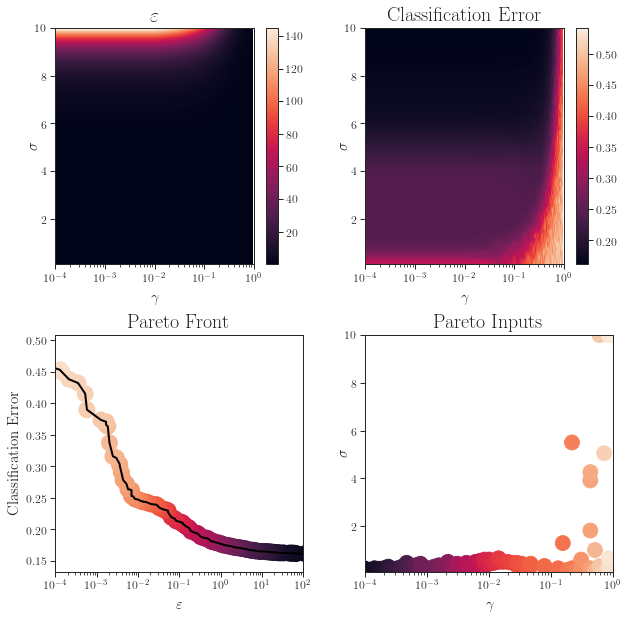

In [13]:
single_row = False

if single_row:
    plt.figure(figsize=(18,3.5))
    grid = plt.GridSpec(1, 4, wspace=.3)
    positions = iter([grid[0,0], grid[0,1], grid[0,2], grid[0,3]])
else:
    plt.figure(figsize=(10,10))
    grid = plt.GridSpec(2, 2, wspace=.25, hspace=0.3)
    positions = iter([grid[0,0], grid[0,1], grid[1,0], grid[1,1]])

# Privacy
plt.subplot(next(positions))
plt.imshow(eps, extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], interpolation='bilinear', aspect='auto')
plt.title('$\\varepsilon$')
plt.ylabel('$\\sigma$', labelpad=-5)
plt.xlabel('$\\gamma$')
plt.colorbar()
plt.xscale('log')
#plt.xlim((min_l,max_l))
#plt.ylim((min_s,max_s))

# Utility
plt.subplot(next(positions))
plt.imshow(scores, extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], aspect='auto', interpolation='bilinear')
plt.title('Classification Error')
plt.ylabel('$\\sigma$', labelpad=-5)
plt.xlabel('$\\gamma$')
plt.colorbar()
plt.xscale('log')
#plt.xlim((min_l,max_l))
#plt.ylim((min_s,max_s))


# True pareto
plt.subplot(next(positions))
plt.plot(x_pareto_data, y_pareto_data, 'k-',lw=2, label = 'Empirical Pareto Front')
plt.scatter(x_pareto_data, y_pareto_data, linewidths=2, c = pareto_index.argsort())
plt.title('Pareto Front')
plt.xlabel('$\\varepsilon$')
plt.ylabel('Classification Error')
plt.xscale('log')
plt.xlim((10**(-4), 10**2))
#plt.xlim((-0.1,50))
#plt.ylim((0,0.5))

# Pareto inputs
plt.subplot(next(positions))
plt.title('Pareto Inputs')
plt.scatter(input_matrix[pareto_index][:,0],input_matrix[pareto_index][:,1], label = 'Pareto inputs',c = pareto_index.argsort())
plt.xlim((min_l,max_l))
plt.ylim((min_s,max_s))
plt.ylabel('$\\sigma$', labelpad=-5)
plt.xlabel('$\\gamma$')
plt.xscale('log')

plt.savefig('psgd_exact.pdf', bbox_inches='tight')

In [14]:
scores_output = 1 - scores_output
eps_output = np.exp(eps_output)

In [15]:
#import GPyOpt
import gpflow
import gpflowopt

/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [16]:
# Setup input domain
domain = gpflowopt.domain.ContinuousParameter('L', min_l, max_l) + \
         gpflowopt.domain.ContinuousParameter('S', min_s, max_s)

In [17]:
num_samples = 250

np.random.seed(12)
idx = np.random.randint(len(scores_output), size=num_samples) 

# X[:,0] is lambda
# X[:,1] is sigma
X = input_matrix[idx,:]
Y_eps = eps_output.reshape(-1,1)[idx,:]
Y_scores = scores_output.reshape(-1,1)[idx,:]
# Y[:,0] is error
# Y[:,1] is epsilon
Y = np.hstack((Y_scores,Y_eps))

In [18]:
# First return value contains scores, seccond contains privacy
y_pareto_data_empirical, x_pareto_data_empirical, pareto_index = psgd.get_pareto_points(Y)

In [19]:
# TODO: decide if we work with eps (like now) or log(eps)!!
# TODO: decide if we work with l and s or their logs (taking log(X))
# Training the models:
### objective_models[0] is for error
### objective_models[0] is for privacy
objective_models = [gpflow.gpr.GPR(X.copy(), Y[:,[i]].copy(), gpflow.kernels.Matern52(2, ARD=False)) for i in range(Y.shape[1])]
for model in objective_models:
    model.likelihood.variance = 0.1
    model.optimize()

hvpoi = gpflowopt.acquisition.HVProbabilityOfImprovement(objective_models)

W1107 13:25:08.744069 140735764603840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/gpflow-0.5-py3.6.egg/gpflow/model.py:142: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1107 13:25:08.745471 140735764603840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/gpflow-0.5-py3.6.egg/gpflow/session.py:74: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1107 13:25:08.818213 140735764603840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/gpflow-0.5-py3.6.egg/gpflow/param.py:450: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1107 13:25:08.841403 140735764603840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/gpflow-0.5-py3.6.egg/gpflow/transforms.py:153: The name tf.log is deprecated. Please use tf.math.log instead.

/usr/local/lib/python3.6/site-packages/gpflowopt-0.

In [20]:
hvpoi

Name,values,prior,constraint
unnamed._models.item0.datascaler.name.kern.lengthscales,[0.97059809],None,+ve
unnamed._models.item0.datascaler.name.kern.variance,[0.1825105],None,+ve
unnamed._models.item0.datascaler.name.likelihood.variance,[0.00068413],None,+ve
unnamed._models.item1.datascaler.name.kern.lengthscales,[0.00202878],None,+ve
unnamed._models.item1.datascaler.name.kern.variance,[19.51190928],None,+ve
unnamed._models.item1.datascaler.name.likelihood.variance,[20.15217531],None,+ve


In [21]:
## We make the predictions with the models

scores_predicted, eps_predicted, _, _, _ = psgd.predict_outputs_with_ranges(l_range, s_range, objective_models[0], objective_models[1] )

## evaluate the hhvpoi in the grid
hvpoi_matrix = np.zeros((len(l_range), len(s_range)))
input_matrix  = np.zeros((len(l_range)*len(s_range),2))

for i in range(len(l_range)):
    for j in range(len(s_range)):
        ## input 
        index = i*len(s_range)+ j
        input_matrix[index,0] =  l_range[i]
        input_matrix[index,1] =  s_range[j]      
        hvpoi_matrix[i,j] = hvpoi.evaluate(input_matrix[index,None])[0,0]


/usr/local/lib/python3.6/site-packages/gpflowopt-0.1.1-py3.6.egg/gpflowopt/acquisition/acquisition.py:193: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.6/site-packages/gpflowopt-0.1.1-py3.6.egg/gpflowopt/acquisition/hvpoi.py:92: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
W1107 13:25:35.295130 140735764603840 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend o

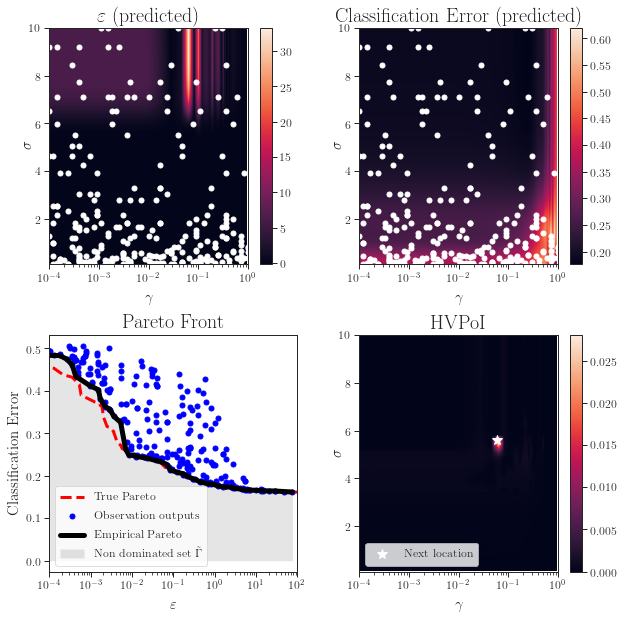

In [22]:
single_row = False

if single_row:
    plt.figure(figsize=(18,3.5))
    grid = plt.GridSpec(1, 4, wspace=.3)
    positions = iter([grid[0,0], grid[0,1], grid[0,2], grid[0,3]])
else:
    plt.figure(figsize=(10,10))
    grid = plt.GridSpec(2, 2, wspace=.25, hspace=0.3)
    positions = iter([grid[0,0], grid[0,1], grid[1,0], grid[1,1]])

# Privacy
plt.subplot(next(positions))
plt.imshow(eps_predicted, extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], interpolation='bilinear', aspect='auto')
plt.plot(X[:,0],X[:,1],'w.',markersize=10,label = 'Samples')
plt.title('$\\varepsilon$ (predicted)')
plt.ylabel('$\\sigma$', labelpad=-5)
plt.xlabel('$\\gamma$')
plt.colorbar()
plt.xscale('log')
#plt.legend()
# plt.xlim((min_l,max_l))
# plt.ylim((min_s,max_s))

# Utility
plt.subplot(next(positions))
plt.imshow(scores_predicted, extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], interpolation='bilinear', aspect='auto')
plt.plot(X[:,0],X[:,1],'w.',markersize=10,label = 'Samples')
plt.title('Classification Error (predicted)')
plt.ylabel('$\\sigma$', labelpad=-5)
plt.xlabel('$\\gamma$')
plt.colorbar()
plt.xscale('log')
#plt.legend()
# plt.xlim((min_l,max_l))
# plt.ylim((min_s,max_s))

# True pareto
plt.subplot(next(positions))
plt.plot(x_pareto_data, y_pareto_data, 'r--',lw=3, label = 'True Pareto')
plt.plot(Y[:,1],Y[:,0],'b.', label = 'Observation outputs',markersize=10)
plt.plot(x_pareto_data_empirical, y_pareto_data_empirical, 'k-', label = 'Empirical Pareto')
# Not sure about this -- commenting for now
plt.fill_between(x_pareto_data_empirical,0,y_pareto_data_empirical ,facecolor='black', alpha=0.1,label='Non dominated set $\\tilde{\Gamma}$')
plt.title('Pareto Front')
plt.ylabel('Classification Error')
plt.xlabel('$\\varepsilon$')
plt.legend(loc=3)
# plt.xlim((np.min(Y[:,1]),np.max(Y[:,1])))
# plt.ylim((0.0,np.max(Y[:,0])))
plt.xlim((10**(-4), 10**2))
# plt.ylim((0.0,np.max(Y[:,0])))
plt.xscale('log')

# Utility
plt.subplot(next(positions))
plt.imshow(hvpoi_matrix, extent=[l_range[0],l_range[-1],s_range[0],s_range[-1]], interpolation='bilinear', aspect='auto')
plt.title('HVPoI')
plt.ylabel('$\\sigma$', labelpad=-5)
plt.xlabel('$\\gamma$')
plt.colorbar()
plt.plot(np.array([0.06]),np.array([5.6]),'w*',markersize=10, lw=5, label = 'Next location')
plt.legend(loc=3)
plt.xscale('log')
plt.xlim((min_l,max_l))
plt.ylim((min_s,max_s))

plt.savefig('psgd_predictions.pdf', bbox_inches='tight')

In [23]:
10**(-4)

0.0001